In [31]:
import pandas as pd
import networkx as nx
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
ciudades = pd.read_csv("Lista_de_paises.csv")
ciudades.set_index(['indice'], inplace=True)
ciudades.head()

,pais,ciudad
indice,,
A,México,Ciudad de México
B,Estados Unidos,Nueva York
C,Canada,Toronto
D,España,Madrid
E,Francia,Paris


In [3]:
rutas = pd.read_csv("Lista_vuelos.csv")
rutas.head()

,origen,destino,precio
0,A,B,8313
1,A,D,16046
2,D,E,2591
3,D,L,2504
4,D,F,13996


In [4]:
caracteristicas = pd.read_csv("Lista_caracteristicas.csv")
caracteristicas.set_index(['precio'], inplace=True)
caracteristicas.head()

,duracion vuelo,aerolinea,duracion estancia
precio,,,
8313,5h 00m,Aeroméxico,4 dias
16046,10h 25m,Aeroméxico,10 dias
2591,2h 55m,Air Europa,10 dias
2504,2h 30m,Air Europa,3 dias
13996,7h 00m,Emirates,7 dias


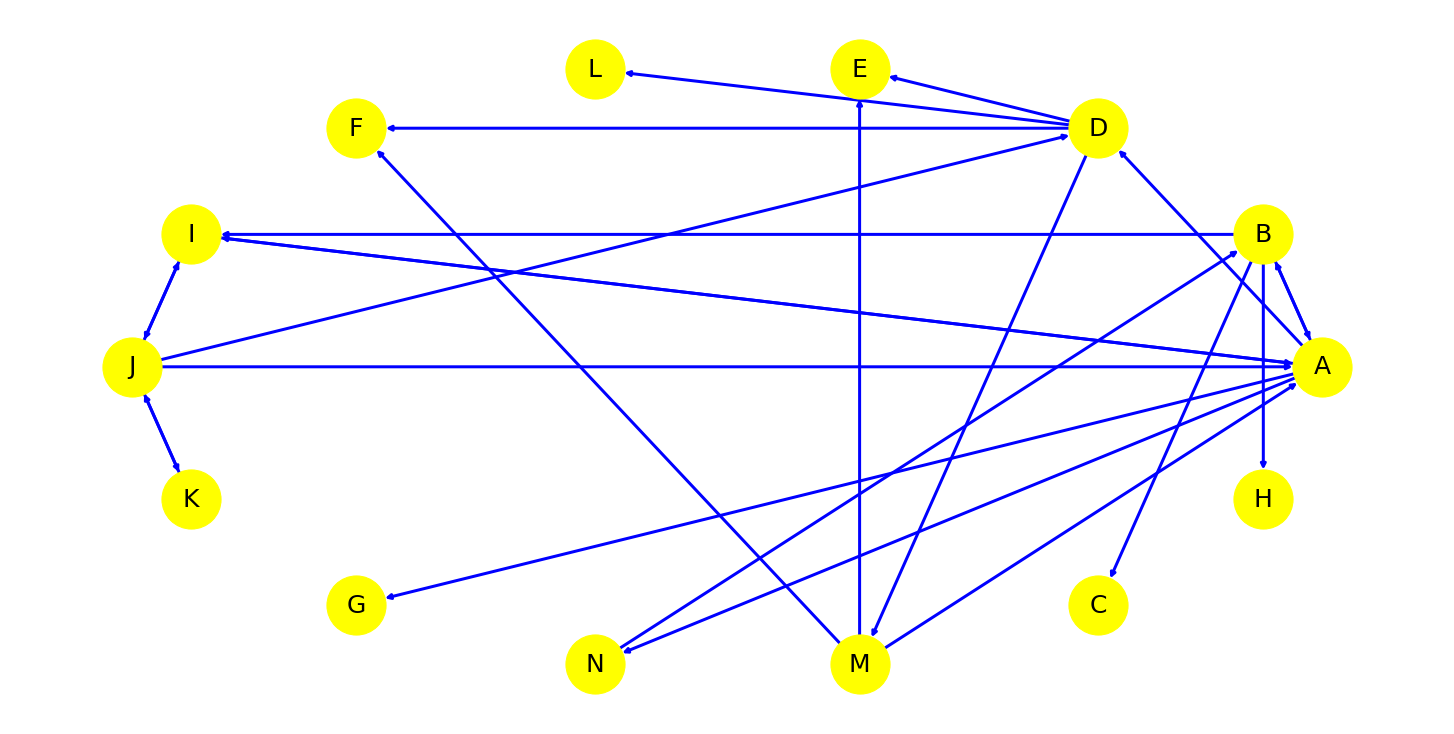

In [32]:
DG = nx.DiGraph()
for filas in rutas.iterrows():
    DG.add_edge(filas[1]['origen'], filas[1]['destino'], peso = filas[1]['precio'])

DG.nodes(data = True)
nx.draw_circular(DG,
                node_color = 'yellow',
                edge_color = 'blue',
                font_size = 25,
                width = 3, with_labels = True, node_size = 3500)

In [25]:
list(nx.all_shortest_paths(DG, source = 'B', target = 'E', weight = None))

[['B', 'A', 'D', 'E']]

In [38]:
def ruta(path):
    total_precio = 0
    for i in range(len(path)-1):
        origen = path[i]
        destino = path[i+1]
        precio = DG[origen][destino]['peso']
        total_precio = total_precio + precio
        print(" %s -> %s \n Ciudad de origen: %s \n Ciudad de llegada: %s \n Aerolinea: %s \n Duracion del vuelo: %s \n Estancia en la ciudad: %s \n Precio individual: %s MXN" % (
             ciudades.loc[origen]['pais'],
             ciudades.loc[destino]['pais'],
             ciudades.loc[origen]['ciudad'],
             ciudades.loc[destino]['ciudad'],
             caracteristicas.loc[precio]['aerolinea'],
             caracteristicas.loc[precio]['duracion vuelo'],
             caracteristicas.loc[precio]['duracion estancia'],
             precio)
             )
        print("------------------------------------------------")
    print("\n Costo total del viaje: %s MXN" %(total_precio))

camino = list(nx.dijkstra_path(DG, source = 'B', target = 'E', weight = 'peso'))
ruta(camino)

 Estados Unidos -> México 
 Ciudad de origen: Nueva York 
 Ciudad de llegada: Ciudad de México 
 Aerolinea: Aeroméxico 
 Duracion del vuelo: 5h 35m 
 Estancia en la ciudad: 13 dias 
 Precio individual: 11523 MXN
------------------------------------------------
 México -> España 
 Ciudad de origen: Ciudad de México 
 Ciudad de llegada: Madrid 
 Aerolinea: Aeroméxico 
 Duracion del vuelo: 10h 25m 
 Estancia en la ciudad: 10 dias 
 Precio individual: 16046 MXN
------------------------------------------------
 España -> Francia 
 Ciudad de origen: Madrid 
 Ciudad de llegada: Paris 
 Aerolinea: Air Europa 
 Duracion del vuelo: 2h 55m 
 Estancia en la ciudad: 10 dias 
 Precio individual: 2591 MXN
------------------------------------------------

 Costo total del viaje: 30160 MXN
